# Project 2 - Aakash Tandel
## Scenario 2: Market research for new store locations


# Getting started

Once you've chosen your scenario, download the data from the Iowa website in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [237]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [238]:
# Load the data into a DataFrame
raw_data = pd.read_csv('/Users/aakashtandel/Desktop/Iowa_liquor_10percent.csv')

# Transform the dates if needed, e.g.
#raw_data["Date"] = pd.to_datetime(df["Date"], format="%m-%d-%y")

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [239]:
raw_data.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [240]:
raw_data.tail()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
270950,12/22/2015,4057,DES MOINES,50316,77.0,Polk,1022100.0,TEQUILA,410,88291,Patron Tequila Silver Mini,300,$20.30,$30.45,4,$121.80,1.20,0.32
270951,11/04/2015,5151,IDA GROVE,51445,47.0,Ida,1011200.0,STRAIGHT BOURBON WHISKIES,259,17956,Evan Williams Str Bourbon,750,$7.47,$11.21,3,$33.63,2.25,0.59
270952,10/20/2015,5152,WATERLOO,50702,7.0,Black Hawk,1011300.0,TENNESSEE WHISKIES,85,26826,Jack Daniels Old #7 Black Lbl,750,$15.07,$22.61,6,$135.66,4.50,1.19
270953,11/20/2015,3562,WEST BURLINGTON,52655,29.0,Des Moines,1082900.0,MISC. IMPORTED CORDIALS & LIQUEURS,192,65258,Jagermeister Liqueur,1750,$26.05,$39.08,6,$234.48,10.50,2.77
270954,01/27/2015,4446,URBANDALE,50322,77.0,Polk,1031080.0,VODKA 80 PROOF,260,37993,Smirnoff Vodka 80 Prf,200,$2.75,$4.13,8,$33.04,1.60,0.42


The data seems to contain wholes sales information for Iowa liquor sales on given dates in 2015 and 2016. This is a transaction-based observation data set. Each observation is unique to the alcohol sold and the quantity at which it was sold. Additional location information, vender information, and sales information is included in each observation.  

It seems there is missing data on 1077 county location observations, though by cross-referencing the Zip Code and City, we could deduce the County and County Number. We are also missing some information about the Category of 68 sales and the Category Name of 632. For a data set of this size, this is relatively few missing values. I will drop these values. But the best way to handle these missing values would be to cross-reference them (along with all other location information like the county, zip code, and city data) with another data source. The state of Iowa may have demographic data that could prove very helpful in this regard. 

In [241]:
raw_data.shape

(270955, 18)

In [242]:
raw_data.dropna(inplace=True)

In [243]:
raw_data.shape

(269258, 18)

In [244]:
raw_data.isnull().sum()

Date                     0
Store Number             0
City                     0
Zip Code                 0
County Number            0
County                   0
Category                 0
Category Name            0
Vendor Number            0
Item Number              0
Item Description         0
Bottle Volume (ml)       0
State Bottle Cost        0
State Bottle Retail      0
Bottles Sold             0
Sale (Dollars)           0
Volume Sold (Liters)     0
Volume Sold (Gallons)    0
dtype: int64

In [245]:
raw_data.duplicated().sum() 

35

In [246]:
raw_data[raw_data.duplicated()]

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
42796,03/02/2015,2190,DES MOINES,50314,77.0,Polk,1052010.0,IMPORTED GRAPE BRANDIES,420,48099,Hennessy VS,200,$5.65,$8.48,24,$203.52,4.80,1.27
44365,11/30/2015,4897,BURLINGTON,52601,29.0,Des Moines,1052010.0,IMPORTED GRAPE BRANDIES,420,48102,Hennessy Vs Cognac 100ml,1200,$38.94,$58.41,4,$233.64,4.80,1.27
55043,01/13/2016,3773,CEDAR RAPIDS,52401,57.0,Linn,1011100.0,BLENDED WHISKIES,260,25607,Seagrams 7 Crown Bl Whiskey,1000,$8.00,$12.00,12,$144.00,12.00,3.17
60976,12/01/2015,5140,CHEROKEE,51012,18.0,Cherokee,1081600.0,WHISKEY LIQUEUR,421,64867,Fireball Cinnamon Whiskey,1000,$11.34,$17.01,12,$204.12,12.00,3.17
63953,01/12/2015,4742,COUNCIL BLUFFS,51501,78.0,Pottawattamie,1062310.0,SPICED RUM,260,43244,Captain Morgan 100 Proof Spiced Rum,750,$10.00,$15.00,12,$180.00,9.00,2.38
90923,06/01/2015,3871,WEST DES MOINES,50266,77.0,Polk,1022100.0,TEQUILA,395,87408,Jose Cuervo Especial Silver,750,$10.49,$15.74,12,$188.88,9.00,2.38
107308,06/25/2015,4265,WATERLOO,50702,7.0,Black Hawk,1031080.0,VODKA 80 PROOF,300,36904,Mccormick Vodka Pet,375,$1.80,$2.70,24,$64.80,9.00,2.38
115677,12/10/2015,4265,WATERLOO,50702,7.0,Black Hawk,1062300.0,FLAVORED RUM,35,43134,Bacardi Limon,375,$4.50,$6.75,2,$13.50,0.75,0.20
120404,06/04/2015,4829,DES MOINES,50314,77.0,Polk,1081015.0,IMPORTED AMARETTO,130,64136,Disaronno Amaretto,750,$13.86,$20.79,12,$249.48,9.00,2.38
136453,08/19/2015,4004,AMES,50010,85.0,Story,1031080.0,VODKA 80 PROOF,301,38176,Titos Vodka,750,$9.65,$14.48,12,$173.76,9.00,2.38


In [247]:
raw_data.drop_duplicates()  

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.00,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.50,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.00,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.50,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.00,5.55
5,04/20/2015,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,$13.32,$19.98,6,$119.88,10.50,2.77
6,08/05/2015,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750,$6.66,$9.99,3,$29.97,2.25,0.59
7,06/25/2015,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750,$15.75,$23.63,2,$47.26,3.50,0.92
8,01/04/2016,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750,$11.49,$17.24,4,$68.96,3.00,0.79
9,11/10/2015,4346,SHELLSBURG,52332,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,82610,Dekuyper Hot Damn!,1000,$7.62,$11.43,2,$22.86,2.00,0.53


Removing the duplicated rows (35 observations) was necessary. 

In [248]:
raw_data.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

Some of the columns will need changes to their type. 

In [249]:
raw_data['Sale (Dollars)'] = raw_data['Sale (Dollars)'].str.replace('$', '')
raw_data['Sale (Dollars)'] = raw_data['Sale (Dollars)'].str.replace(',', '')
raw_data['Sale (Dollars)']
raw_data['Sale (Dollars)'] = raw_data['Sale (Dollars)'].astype(float)

In [250]:
raw_data['State Bottle Cost'] = raw_data['State Bottle Cost'].str.replace('$', '')
raw_data['State Bottle Cost'] = raw_data['State Bottle Cost'].str.replace(',', '')
raw_data['State Bottle Cost']
raw_data['State Bottle Cost'] = raw_data['State Bottle Cost'].astype(float)
raw_data['State Bottle Cost']

0          4.50
1         13.75
2         12.59
3          9.50
4          7.20
5         13.32
6          6.66
7         15.75
8         11.49
9          7.62
10        26.24
11         6.00
12         8.92
13        10.00
14         7.50
15         4.50
16         1.13
17         6.50
18         4.92
19         9.97
20        14.25
21         5.23
22         7.00
23        10.49
24         3.37
25        17.90
26         7.35
27         3.50
28        10.99
29         4.90
          ...  
270925     6.00
270926    31.00
270927     9.25
270928     1.80
270929     3.57
270930     1.93
270931     5.25
270932    29.67
270933     9.00
270934    10.00
270935    15.07
270936    10.49
270937    18.56
270938     4.75
270939     4.89
270940    12.03
270941     6.68
270942     5.51
270943     6.83
270944     4.75
270945     0.89
270946     9.65
270947     5.00
270948     8.50
270949     4.13
270950    20.30
270951     7.47
270952    15.07
270953    26.05
270954     2.75
Name: State Bottle Cost,

In [251]:
raw_data['State Bottle Retail'] = raw_data['State Bottle Retail'].str.replace('$', '')
raw_data['State Bottle Retail'] = raw_data['State Bottle Retail'].str.replace(',', '')
raw_data['State Bottle Retail']
raw_data['State Bottle Retail'] = raw_data['State Bottle Retail'].astype(float)
raw_data['State Bottle Retail']

0          6.75
1         20.63
2         18.89
3         14.25
4         10.80
5         19.98
6          9.99
7         23.63
8         17.24
9         11.43
10        39.36
11         9.25
12        13.38
13        15.00
14        11.25
15         6.75
16         1.70
17         9.75
18         7.38
19        14.96
20        21.38
21         7.85
22        10.50
23        15.74
24         5.06
25        26.85
26        11.03
27         5.25
28        16.49
29         7.35
          ...  
270925     9.00
270926    46.50
270927    13.88
270928     2.70
270929     5.36
270930     2.90
270931     7.88
270932    44.51
270933    13.50
270934    15.00
270935    22.61
270936    15.74
270937    27.84
270938     7.13
270939     7.34
270940    18.05
270941    10.27
270942     8.27
270943    10.25
270944     7.13
270945     1.34
270946    14.48
270947     7.50
270948    12.75
270949     6.20
270950    30.45
270951    11.21
270952    22.61
270953    39.08
270954     4.13
Name: State Bottle Retai

In [252]:
raw_data['Vendor Number'] = raw_data['Vendor Number'].astype(str)
raw_data['Store Number'] = raw_data['Store Number'].astype(str)

In [253]:
raw_data.shape

(269258, 18)

This is only 10% of the true dataset. We will have over 2 million observations when we load the full dataframe.

In [254]:
raw_data.columns

Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)'],
      dtype='object')

In [255]:
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

#### Checking Location Columns

In [256]:
raw_data["Zip Code"].value_counts()

50010    7077
52402    6938
52240    6128
50613    5267
52001    4755
51501    4652
50314    4519
50317    4425
50265    4356
52404    4242
50401    4119
52722    3699
52807    3530
52405    3502
52241    3446
52761    3389
50311    3384
51503    3382
50320    3237
52501    3206
50702    3175
50315    3091
52804    2973
50501    2972
52601    2952
50703    2885
50322    2880
50266    2843
52732    2822
50158    2682
         ... 
52625      17
50514      17
50044      16
50541      16
50542      15
50261      15
52623      15
51053      15
51002      14
51466      14
50071      13
50251      12
50830      12
52223      11
50150      11
51005      11
51038      10
51553       9
52337       9
50452       8
51338       7
50061       6
50540       6
50162       6
50634       6
51535       5
51530       3
51453       3
52801       2
52328       2
Name: Zip Code, Length: 412, dtype: int64

In [257]:
raw_data["City"].value_counts(dropna=False)

DES MOINES         23618
CEDAR RAPIDS       18736
DAVENPORT          11469
WATERLOO            8376
COUNCIL BLUFFS      8037
IOWA CITY           7938
SIOUX CITY          7888
AMES                7534
WEST DES MOINES     7148
DUBUQUE             6854
CEDAR FALLS         5719
ANKENY              4823
MASON CITY          4119
BETTENDORF          3699
CORALVILLE          3446
MUSCATINE           3389
BURLINGTON          3137
CLINTON             3077
FORT DODGE          2972
WINDSOR HEIGHTS     2797
MARSHALLTOWN        2682
NEWTON              2538
STORM LAKE          2522
MARION              2485
URBANDALE           2424
OTTUMWA             2290
JOHNSTON            2137
ALTOONA             2103
CLEAR LAKE          2080
SPENCER             1910
                   ...  
ARMSTRONG             17
DONNELLSON            17
BUSSEY                16
GILMORE CITY          16
DANVILLE              15
GOLDFIELD             15
WASHBURN              15
SCHALLER              15
VAN METER             15


In [258]:
raw_data["County"].value_counts(dropna=False)

Polk             48944
Linn             23462
Scott            16630
Black Hawk       15030
Johnson          13163
Pottawattamie     9088
Story             8944
Woodbury          8541
Dubuque           7739
Cerro Gordo       6360
Des Moines        4082
Muscatine         3975
Clinton           3569
Wapello           3522
Dickinson         3409
Lee               3319
Webster           3144
Marshall          2984
Jasper            2828
Buena Vista       2737
Dallas            2707
Marion            2601
Warren            2460
Bremer            2240
Boone             2105
Poweshiek         2087
Clay              1917
Carroll           1911
Jones             1871
O'Brien           1720
                 ...  
Greene             675
Wright             671
Shelby             661
Ida                634
Howard             606
Humboldt           588
Adair              584
Grundy             566
Pocahontas         525
Mills              507
Louisa             484
Lucas              475
Chickasaw  

In [259]:
raw_data["County Number"].value_counts(dropna=False)

77.0    48944
57.0    23462
82.0    16630
7.0     15030
52.0    13163
78.0     9088
85.0     8944
97.0     8541
31.0     7739
17.0     6360
29.0     4082
70.0     3975
23.0     3569
90.0     3522
30.0     3409
56.0     3319
94.0     3144
64.0     2984
50.0     2828
11.0     2737
25.0     2707
63.0     2601
91.0     2460
9.0      2240
8.0      2105
79.0     2087
21.0     1917
14.0     1911
53.0     1871
71.0     1720
        ...  
37.0      675
99.0      671
83.0      661
47.0      634
45.0      606
46.0      588
1.0       584
38.0      566
76.0      525
65.0      507
58.0      484
59.0      475
19.0      464
39.0      437
13.0      424
12.0      402
98.0      387
41.0      363
68.0      352
72.0      351
54.0      343
87.0      298
89.0      245
2.0       234
5.0       227
27.0      223
26.0      203
80.0      201
93.0      160
36.0       27
Name: County Number, Length: 99, dtype: int64

For our location data, we can see that there are 100 county numbers, 99 counties, 382 cities, and 412 zip codes. This information is not verified. Again, it would be wise to cross-reference this data with the state's municipality records to make sure the location variables are properly accounted for. 

#### Checking Liquor Type Information

In [260]:
raw_data["Category Name"].value_counts(dropna=False)

VODKA 80 PROOF                        35256
CANADIAN WHISKIES                     26967
STRAIGHT BOURBON WHISKIES             15290
SPICED RUM                            14575
VODKA FLAVORED                        13931
TEQUILA                               12044
BLENDED WHISKIES                      11507
WHISKEY LIQUEUR                       10865
IMPORTED VODKA                        10640
PUERTO RICO & VIRGIN ISLANDS RUM      10020
FLAVORED RUM                           7245
TENNESSEE WHISKIES                     7058
AMERICAN COCKTAILS                     6883
AMERICAN GRAPE BRANDIES                6560
AMERICAN DRY GINS                      6542
IMPORTED VODKA - MISC                  6471
MISC. IMPORTED CORDIALS & LIQUEURS     6281
CREAM LIQUEURS                         6256
SCOTCH WHISKIES                        5358
IMPORTED GRAPE BRANDIES                4592
IMPORTED SCHNAPPS                      4229
MISC. AMERICAN CORDIALS & LIQUEURS     3387
100 PROOF VODKA                 

We have 72 different categories of alcohol. These are highly differentiated. If we were to analyze the categories further, it may be wise to group in broader categories. For example, all whiskeys and bourbons could be in one category, all vodkas in another, etc.

In [261]:
raw_data.groupby('City').agg(['count', 'mean',])
#raw_data.groupby('City').describe()

County Number            Category               Item Number  \
                        count       mean    count          mean       count   
City                                                                          
ACKLEY                     91  61.428571       91  1.036135e+06          91   
ADAIR                      43   1.000000       43  1.036303e+06          43   
ADEL                      318  25.000000      318  1.041052e+06         318   
AFTON                      12  88.000000       12  1.034468e+06          12   
AKRON                      69  75.000000       69  1.041131e+06          69   
ALBIA                     341  68.000000      341  1.042117e+06         341   
ALDEN                     122  42.000000      122  1.046311e+06         122   
ALGONA                   1025  55.000000     1025  1.043449e+06        1025   
ALLISON                    83  12.000000       83  1.039737e+06          83   
ALTA                       14  11.000000       14  1.027402e+06          14   
ALTOONA                  2103  77.000000     2103  1.043468e+06        2103   
AMES                     7534  85.000000     7534  1.043652e+06        7534   
ANAMOSA                   583  53.000000      583  1.041160e+06         583   
ANITA                     148  15.000000      148  1.039702e+06         148   
ANKENY                   4823  77.000000     4823  1.042100e+06        4823   
ANTHON                    164  97.000000      164  1.038998e+06         164   
ARLINGTON                  76  33.000000       76  1.039817e+06          76   
ARMSTRONG                  17  32.000000       17  1.041705e+06          17   
ARNOLD'S PARK             242  30.000000      242  1.045657e+06         242   
ARNOLDS PARK              497  30.000000      497  1.041015e+06         497   
ATLANTIC                 1037  15.000000     1037  1.041025e+06        1037   
AUDUBON                   205   5.000000      205  1.050303e+06         205   
AURELIA                    11  18.000000       11  1.025110e+06          11   
AVOCA                     457  78.000000      457  1.048074e+06         457   
BALDWIN                    26  49.000000       26  1.051045e+06          26   
BANCROFT                  371  55.000000      371  1.057044e+06         371   
BAXTER                     58  50.000000       58  1.043054e+06          58   
BEDFORD                   157  87.000000      157  1.039919e+06         157   
BELLE PLAINE              414   6.000000      414  1.045961e+06         414   
BELLEVUE                  238  49.000000      238  1.045503e+06         238   
...                       ...        ...      ...           ...         ...   
WALKER                     20  57.000000       20  1.034144e+06          20   
WALL LAKE                  14  81.000000       14  1.051171e+06          14   
WALNUT                     52  78.000000       52  1.042181e+06          52   
WAPELLO                   194  58.000000      194  1.042239e+06         194   
WASHBURN                   15   7.000000       15  1.053605e+06          15   
WASHINGTON               1322  92.000000     1322  1.051992e+06        1322   
WATERLOO                 8376   7.000000     8376  1.046295e+06        8376   
WAUKEE                   1395  25.000000     1395  1.047143e+06        1395   
WAUKON                    800   3.000000      800  1.045056e+06         800   
WAVERLY                  1544   9.000000     1544  1.045084e+06        1544   
WEBSTER CITY              876  40.000000      876  1.047209e+06         876   
WELLMAN                   245  90.000000      245  1.044764e+06         245   
WELLSBURG                  21  38.000000       21  1.027691e+06          21   
WESLEY                    140  55.000000      140  1.053252e+06         140   
WEST BEND                 106  55.000000      106  1.053518e+06         106   
WEST BRANCH               262  16.000000      262  1.043084e+06         262   
WEST BURLINGTON           587  29.000000      587  1.046392e+06   

The data above shows a quick breakdown of county level data. We are most interested in the average sales in each county and the number of sales in that county. We will refine the dataframe later to have this data more readily available. 

In [262]:
raw_data.groupby('Store Number').agg(['count', 'mean','sum'])

County Number                 Category                \
                     count  mean       sum    count          mean   
Store Number                                                        
2106                   652   7.0    4564.0      652  1.049326e+06   
2113                   184  94.0   17296.0      184  1.039169e+06   
2130                   508   7.0    3556.0      508  1.046575e+06   
2152                   161  17.0    2737.0      161  1.040562e+06   
2178                   295   3.0     885.0      295  1.044011e+06   
2190                  1615  77.0  124355.0     1615  1.041177e+06   
2191                   739  56.0   41384.0      739  1.052357e+06   
2200                   485  81.0   39285.0      485  1.043558e+06   
2205                   287  73.0   20951.0      287  1.050721e+06   
2228                   306  61.0   18666.0      306  1.048064e+06   
2233                   290  30.0    8700.0      290  1.040355e+06   
2238                    62  77.0    4774.0       62  1.050765e+06   
2248                   556  77.0   42812.0      556  1.039890e+06   
2285                   357  52.0   18564.0      357  1.038472e+06   
2290                  1036  11.0   11396.0     1036  1.044137e+06   
2327                   234   2.0     468.0      234  1.042328e+06   
2353                   390  45.0   17550.0      390  1.053518e+06   
2367                    45  73.0    3285.0       45  1.034499e+06   
2413                   604  31.0   18724.0      604  1.041525e+06   
2445                   200  78.0   15600.0      200  1.040091e+06   
2448                   505  91.0   45955.0      505  1.048269e+06   
2459                   132  39.0    5148.0      132  1.040730e+06   
2460                   333  35.0   11655.0      333  1.046368e+06   
2465                   460  31.0   14260.0      460  1.046233e+06   
2475                   106  55.0    5830.0      106  1.053518e+06   
2478                   107  77.0    8239.0      107  1.038203e+06   
2487                   409  53.0   21677.0      409  1.042414e+06   
2498                    76  33.0    2508.0       76  1.039817e+06   
2500                  1519  85.0  129115.0     1519  1.043704e+06   
2501                  1548  85.0  131580.0     1548  1.044951e+06   
...                    ...   ...       ...      ...           ...   
5185                    21  52.0    1092.0       21  1.035852e+06   
5186                    10  33.0     330.0       10  1.041586e+06   
5187                   109  85.0    9265.0      109  1.048009e+06   
5188                    27  97.0    2619.0       27  1.042260e+06   
5189                     5  77.0     385.0        5  1.039636e+06   
5190                    30  57.0    1710.0       30  1.035382e+06   
5191                     6  39.0     234.0        6  1.033533e+06   
5192                     2  57.0     114.0        2  1.056550e+06   
5193                     3  13.0      39.0        3  1.034827e+06   
5195                     3  78.0     234.0        3  1.041807e+06   
5196                    24  52.0    1248.0       24  1.033334e+06   
5198                   152  82.0   12464.0      152  1.041209e+06   
5199                    44  33.0    1452.0       44  1.125957e+06   
5201                     3  31.0      93.0        3  1.048763e+06   
5202                     6   7.0      42.0        6  1.019480e+06   
5203                    33  14.0     462.0       33  1.030999e+06   
5204                    57  29.0    1653.0       57  1.035411e+06   
5205                    16  14.0     224.0       16  1.050199e+06   
5206                    38  38.0    1444.0       38  1.044532e+06   
5207                    70  57.0    3990.0       70  1.057418e+06   
5211                    19  77.0    1463.0       19  1.033101e+06   
5212                    27  17.0     459.0       27  1.042771e+06   
5213                    13  56.0     728.0       13  1.024519e+06   
5215                    55  82.0    4510.0       55  1.047280e+06   
9001       

There are 1400 unique stores in the data set. The sum of sales, average sale, and number of sales from particular liquor stores can be seen above. This information will also be helpful later on. 

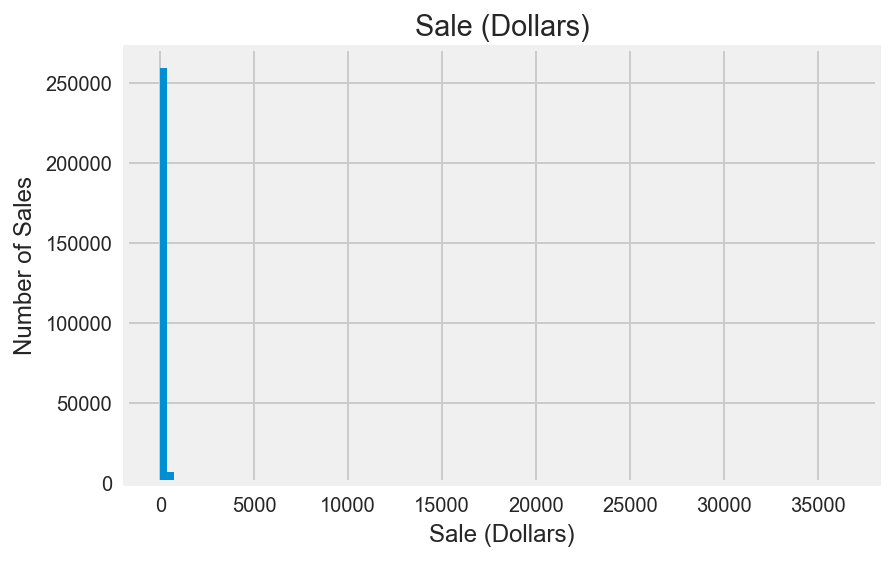

In [263]:
pd.DataFrame.hist(raw_data, column='Sale (Dollars)', bins=100)
plt.xlabel('Sale (Dollars)')
plt.ylabel('Number of Sales')

The vast majority of sales are less than 1000 dollars. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x144944850>]], dtype=object)

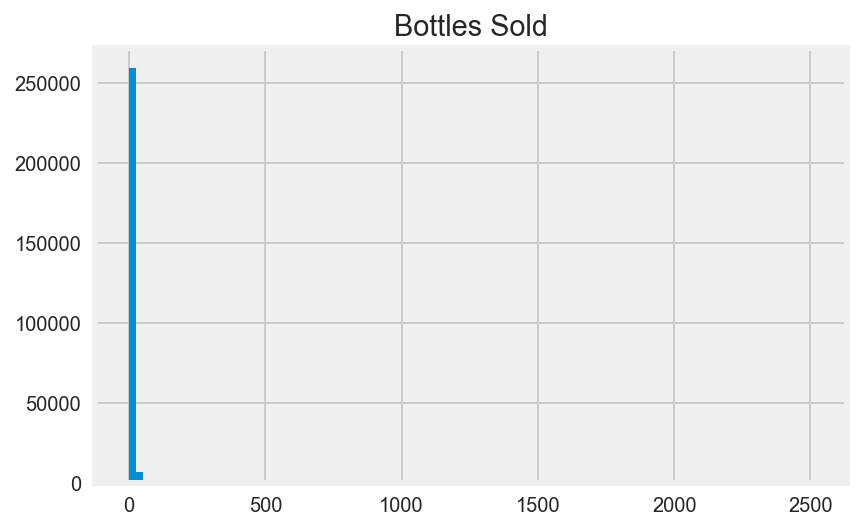

In [264]:
pd.DataFrame.hist(raw_data, column='Bottles Sold', bins=100)

The vast majority of the sales are of quantities (in bottles) of less than 100 bottles. 

# Record your findings

Be sure to write out anything observations from your exploratory analysis.


This is a large dataset and that is a great thing. When loading the full dataset, there will be upwards of 2.7 million observations. We removed the 35 duplicated columns from the dataframe, as well as the 1067 null values. Because of our large number of observations, this should have very little effect on our analysis. For our location data, we can see that there are 100 county numbers, 99 counties, 382 cities, and 412 zip codes. It would be wise to cross-reference this data with the state's municipality records to make sure the location variables are properly matched across city, county, and zip code. We see that a large number of observations are found in Polk County, the city of Des Moines, and the zip code 50010 (Ames, Iowa). Ames is the home of Iowa State. This makes logical sense because these are the main urban centers in the state of Iowa and a larger number of people should correlate positively with a higher number of liquor sales. We have 72 different categories of alcohol. These are highly differentiated. If we were to analyze the categories further, it may be wise to group in broader categories. For example, all whiskeys and bourbons could be in one category, all vodkas in another, etc. There are 1400 unique stores in the data set. The vast majority of sales are of quantities of less than 100 bottles and of transactions less than $1,000. We continue our analysis below. 

Risks and Assumptions: One major assumption we will make is that the location data and sales data is correct. There are ways to verify both of these points, but that is beyond the scope of this project. Data entry error, missing information, and other data problems could drastically affect our predictive model. We are going to assume the data is valid after we corrected for the duplicated and missing values as stated above. Another assumption we are going to make is that the errors in sales data are normally distributed and not correlated. This could be violated if one Iowa liquor surveyor consistently erred in data entry in the same manner. For example, say this person accidently increased all of the Des Moines city sales data by a factor of 10 (incorrectly placing the decimal point in the data entry process). This would systematically correlate the error across multiple observations and violating the linear model assumptions.  

# Mine the data

Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations here for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.
 


#### Generating a new dataframe.
The best way to determine which locations provide the highest return, I have decided to create new dataframes or tables. One table will be organized by county and the other by zip code. They will contain columns of the following: total sales (in dollars),  total number of bottles, number of stores, average price per bottle, and volume sold (in liters). We will train our model with the volume sold column as our target response variable. Presumably, a higher volume of liquor sold to the store (assuming that store can sell the liquor) will result in higher profits. The counties or zip codes with the highest predicted total volume will be the counties to open a store in (assuming our model is reliable).

#### Generating Year and Month Columns

In [286]:
raw_data.columns

Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)',
       u'Year', u'Month'],
      dtype='object')

In [287]:
raw_data['Date'] = pd.to_datetime(raw_data['Date'], infer_datetime_format=True)
raw_data['Year'] = raw_data.Date.apply(lambda x : x.year)
raw_data['Month'] = raw_data.Date.apply(lambda x : x.month)
raw_data.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Year,Month
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38,2015,11
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40,2016,3
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34,2016,2
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77,2016,2
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55,2015,8


#### Generating Total Number of Bottles Sold per Location

In [275]:
#raw_data['Retail-Cost'] = raw_data['State Bottle Retail'] - raw_data['State Bottle Cost']
#drinks.groupby('continent').mean()
#raw_data['Total Sales'] = ''
#raw_data['Total Sales'] = raw_data.groupby('Zip Code').sum
#iowa_df['Total Bottles Sold'] = ' '
#for each in ['Bottles Sold']:
    #df_bottles[each]  # .loc[:, ['Bottles Sold']]
#iowa_df = pd.DataFrame({'Total Bottles Sold' : raw_data.groupby('Zip Code').agg('sum')}).reset_index()
#raw_data.head()
#iowa_df.sort_values('Zip Code')
#iowa_df['Total Bottles Sold'] = 

d_bottles = raw_data.groupby('Zip Code').agg(['sum',]).loc[:, ['Bottles Sold']] 
d_bottles.rename(columns={'Bottles Sold':'Total Bottles'}, inplace=True)

df_bottles = raw_data.groupby('County').agg(['sum',]).loc[:, ['Bottles Sold']] 
df_bottles.rename(columns={'Bottles Sold':'Total Bottles'}, inplace=True)
df_bottles.head()

,Total Bottles
,sum
County,
Adair,4650
Adams,955
Allamakee,7450
Appanoose,8171
Audubon,1694


In [291]:
#iowa_df.sort_values('Zip Code')
#iowa_df.head()
raw_data.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Year,Month
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38,2015,11
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40,2016,3
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34,2016,2
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77,2016,2
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55,2015,8


#### Generating Total Sales per Location
These are sales from the state to the store, NOT the store to the customer. 

In [310]:
d_sales = raw_data.groupby('Zip Code').agg(['sum',]).loc[:, ['Sale (Dollars)']] 
d_sales.head()

df_sales = raw_data.groupby('County').agg(['sum',]).loc[:, ['Sale (Dollars)']] 
df_sales.head()

,Sale (Dollars)
,sum
County,
Adair,55544.20
Adams,12441.71
Allamakee,99000.00
Appanoose,98429.87
Audubon,19655.54


#### Generating Total Number of Stores per Location

In [301]:
d_store = raw_data.groupby('Zip Code').agg(['count',]).loc[:, ['Store Number']] 

df_store = raw_data.groupby('County').agg(['count',]).loc[:, ['Store Number']]
df_store.head()

,Store Number
,count
County,
Adair,584
Adams,234
Allamakee,1044
Appanoose,1040
Audubon,227


#### Generating Total Volume Sold (Liters) per County

In [293]:
d_vol = raw_data.groupby('Zip Code').agg(['sum',]).loc[:, ['Volume Sold (Liters)']] 

df_vol = raw_data.groupby('County').agg(['sum',]).loc[:, ['Volume Sold (Liters)']] 
df_vol.head()

,Volume Sold (Liters)
,sum
County,
Adair,4359.84
Adams,981.38
Allamakee,7868.04
Appanoose,8038.16
Audubon,1717.80


#### Generating Average Price per Bottle per County

In [294]:
d_pr = raw_data.groupby('Zip Code').agg(['mean']).loc[:,['State Bottle Retail']] 
d_pr.rename(columns={'State Bottle Retail':'Price per Bottle'}, inplace=True)

df_pr = raw_data.groupby('County').agg(['mean']).loc[:,['State Bottle Retail']] 
df_pr.rename(columns={'State Bottle Retail':'Price per Bottle'}, inplace=True)
df_pr.head()

,Price per Bottle
,mean
County,
Adair,13.985908
Adams,15.253248
Allamakee,14.974856
Appanoose,14.301260
Audubon,13.117225


#### A quick look through our new dataframes. 

In [303]:
df_iowa_zip = pd.concat([d_bottles, d_store, d_sales, d_pr, d_vol], axis=1)
df_iowa_zip.head()

,Total Bottles,Store Number,Sale (Dollars),Price per Bottle,Volume Sold (Liters)
,sum,count,sum,mean,sum
Zip Code,,,,,
50002,588,43,5851.20,11.866977,391.35
50003,3637,318,47716.10,12.704717,3522.00
50006,756,122,12280.24,18.293115,860.24
50009,22665,2103,294558.39,14.402796,20282.54
50010,64738,7077,931101.58,15.724516,63313.43


In [304]:
df_iowa_county = pd.concat([df_bottles, df_store, df_sales, df_pr, df_vol], axis=1)
df_iowa_county.head()

,Total Bottles,Store Number,Sale (Dollars),Price per Bottle,Volume Sold (Liters)
,sum,count,sum,mean,sum
County,,,,,
Adair,4650,584,55544.20,13.985908,4359.84
Adams,955,234,12441.71,15.253248,981.38
Allamakee,7450,1044,99000.00,14.974856,7868.04
Appanoose,8171,1040,98429.87,14.301260,8038.16
Audubon,1694,227,19655.54,13.117225,1717.80


This dataframe shows the target variable, Volume Sold, and the features (Total Bottles, Store Count, Sales Sum) in more detail. These are all combined at the county level and the zip code level. 

# Refine the data

Look for any statistical relationships, correlations, or other relevant properties of the dataset.

In [305]:
df_iowa_zip.corr()

,,Total Bottles,Store Number,Sale (Dollars),Price per Bottle,Volume Sold (Liters)
,,sum,count,sum,mean,sum
Total Bottles,sum,1.000000,0.938426,0.988369,0.245384,0.988971
Store Number,count,0.938426,1.000000,0.917647,0.263565,0.935830
Sale (Dollars),sum,0.988369,0.917647,1.000000,0.280177,0.995036
Price per Bottle,mean,0.245384,0.263565,0.280177,1.000000,0.275512
Volume Sold (Liters),sum,0.988971,0.935830,0.995036,0.275512,1.000000


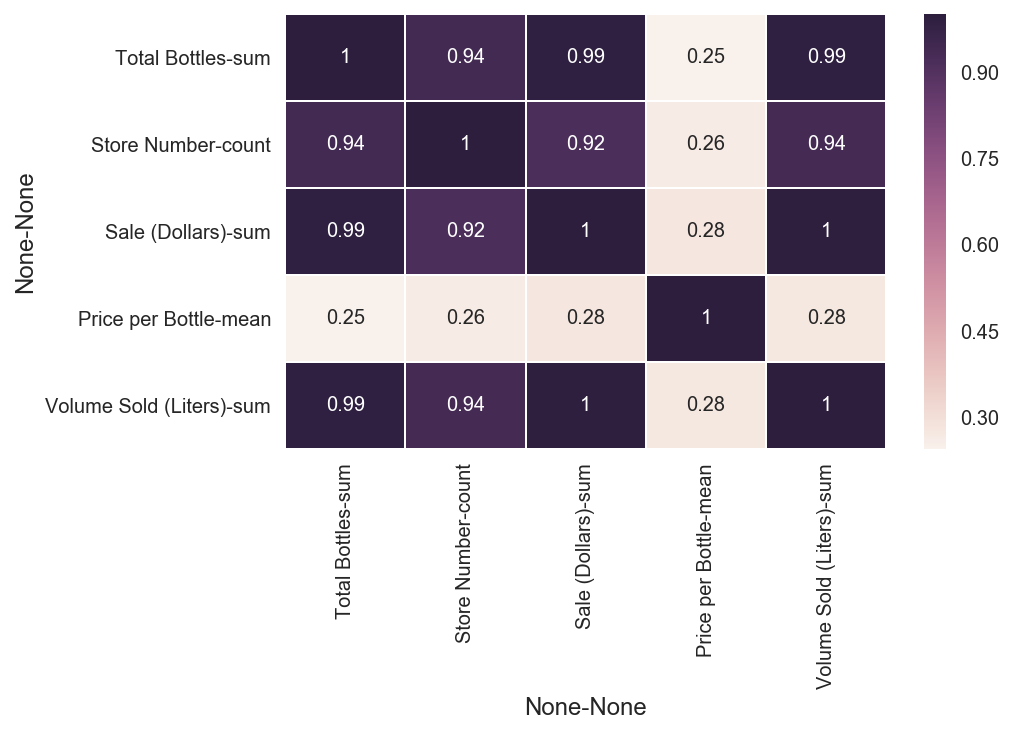

In [306]:
import seaborn.linearmodels as sblm
sns.heatmap(df_iowa_zip.corr(), annot = True, linewidths = 0.5)

In [307]:
df_iowa_county.corr()

,,Total Bottles,Store Number,Sale (Dollars),Price per Bottle,Volume Sold (Liters)
,,sum,count,sum,mean,sum
Total Bottles,sum,1.000000,0.996538,0.998442,0.145162,0.998671
Store Number,count,0.996538,1.000000,0.995067,0.156216,0.997007
Sale (Dollars),sum,0.998442,0.995067,1.000000,0.155624,0.999320
Price per Bottle,mean,0.145162,0.156216,0.155624,1.000000,0.157065
Volume Sold (Liters),sum,0.998671,0.997007,0.999320,0.157065,1.000000


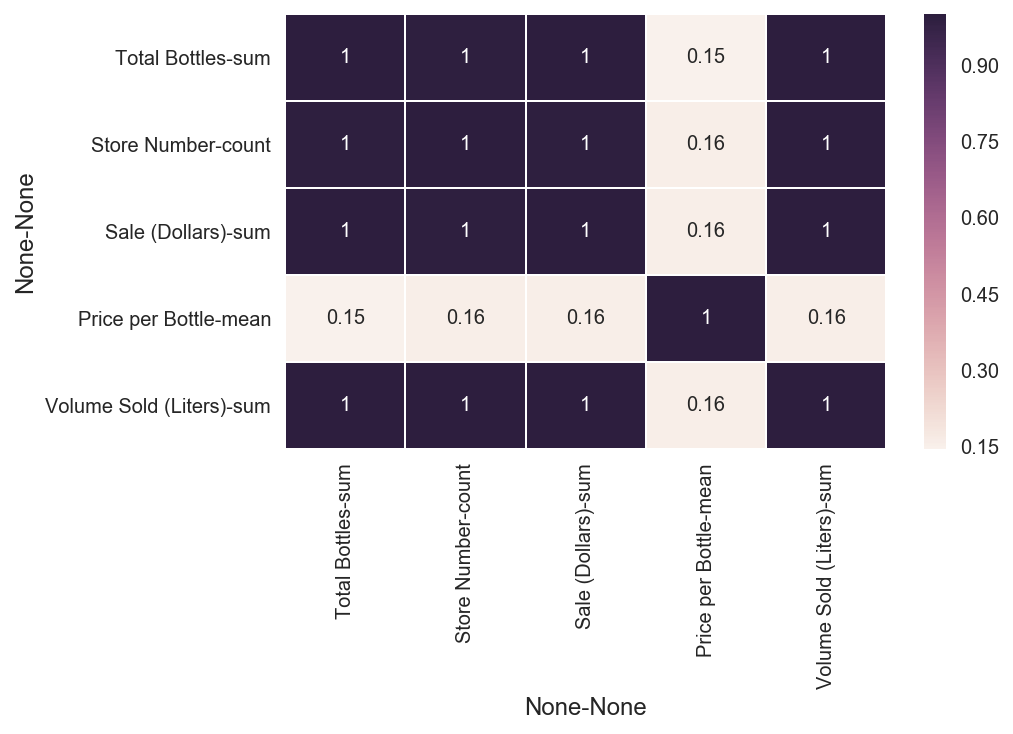

In [308]:
sns.heatmap(df_iowa_county.corr(), annot = True, linewidths = 0.5)

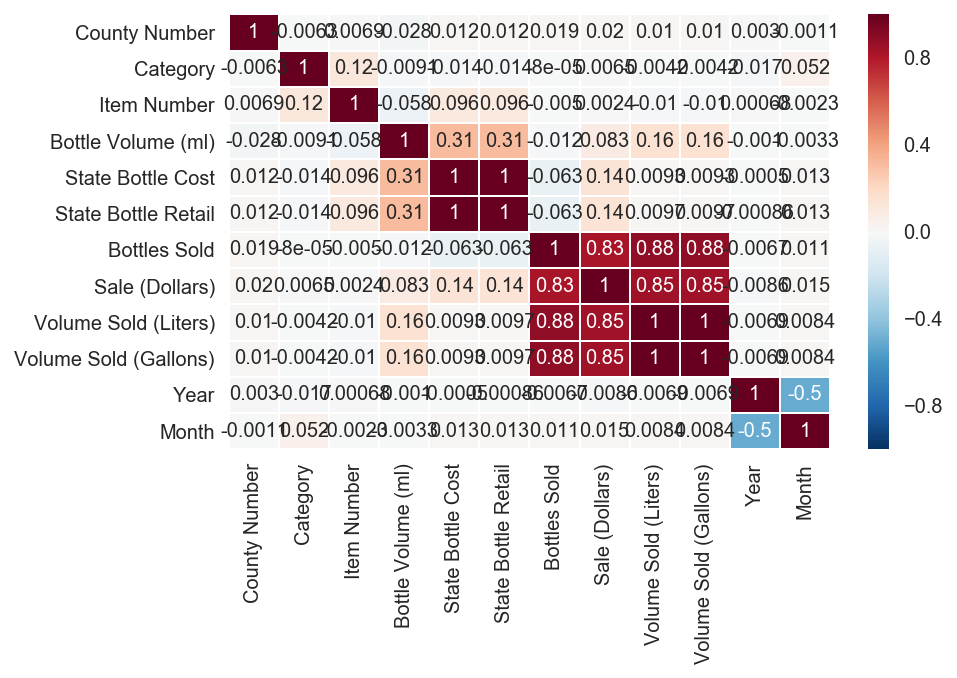

In [309]:
sns.heatmap(raw_data.corr(), annot = True, linewidths = 0.5)

Based on this heatmap of correlations, we can say a few things. The variables Volume Sold and Sales (Dollars) are nearly perfectly correlated. This is perfect correlation and we would need to ommit one of the variables. I will leave the Volume Sold out of the equation. Now our target variable will Sales (Dollars). We see a relatively weak correlation between Sales (Dollars) and Price per Bottle. We see very high correlations between Sales (Dollars) and Vendor Count and Total Bottles sum. This high multicollinearity will need to be accounted for with interaction terms. 

In [86]:
import patsy

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

Build models of total sales based on location, price per bottle, total bottles sold. You may find it useful to build models for each county, zip code, or city.

#### Training Test Split
We first need to split our data into a training set and a test set. This will allow us to check how well our model performs on new data (the test set) in the end. We would hope it performs well. 

#### Fit Model to the Training Set
We need to fit our model to the training data. 

#### Verify Model with K-folds Cross-Validation
We need to check our model with k-folds cross-validation. If the model performs poorly here, we can change our model and check k-folds again.

#### Test Model with Test Set
Now that we are happy with our model's performance, we need to truly test the model. Test the model with the initial test set. 

# Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

#### Provide a table of the best performing stores by location type of your choice (city, county, or zip code) and the predictions of your model(s).

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

#### Based on your models and the table of data, recommend some general locations to the business owner, taking into account model performance. Validate your model's performance and ability to predict future sales using cross-validation.

#### Recommend targets for volume sold and price per bottle!